# Лабораторная работа №3. Компьютерная геометрия.
Подмогильный Иван Александрович 

## Задание №1

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import animation as animation
from rotations import xy_rotation, center_rotation
import matplotlib.patches as mpatches

In [3]:
def myplot(x, y):
    fig = plt.figure( figsize=(10, 10) )
    ax = fig.add_subplot(1, 1, 1)
    ax.set_aspect('equal')
    ax.grid()
    ax.plot(x, y)

def rot_mat(delta):
    return np.array([[np.cos(delta), np.sin(delta)],
                   [-np.sin(delta), np.cos(delta)]])

In [4]:
th = np.linspace(0, np.pi*2, 1000)

def conventional_circle(th):
    # Conventional circle definition
    r = 2
    x = np.array(r * np.cos(th))
    y = np.array(r * np.sin(th))
    return x, y


def optimized_circle(th):
    # Optimized circle definition
    xy = np.zeros([1000, 2])
    xy[0] = np.array([1, 0])
    delta = 2 * np.pi / 1000
    rot = rot_mat(delta)

    for i in range(1, 1000):
        xy[i] = xy[i-1] @ rot

    return xy


In [5]:
%%timeit -t
x, y = conventional_circle(th)

50 µs ± 5.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
x, y = conventional_circle(th)


In [7]:
%%timeit -t
xy = optimized_circle(th)

2.5 ms ± 381 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
xy = optimized_circle(th)


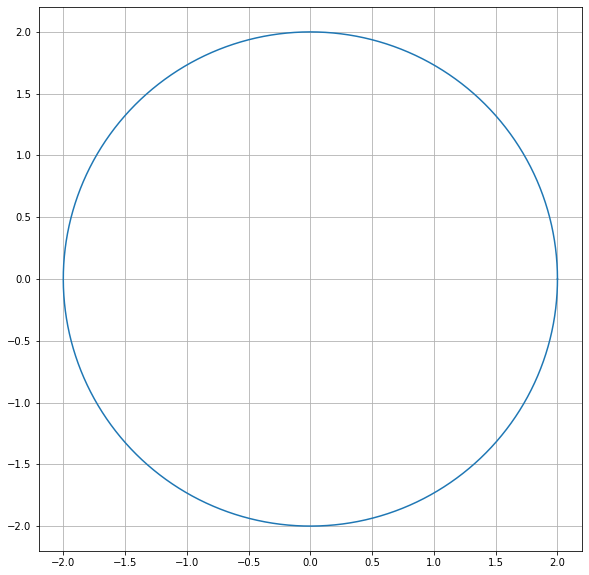

In [9]:
myplot(x, y)

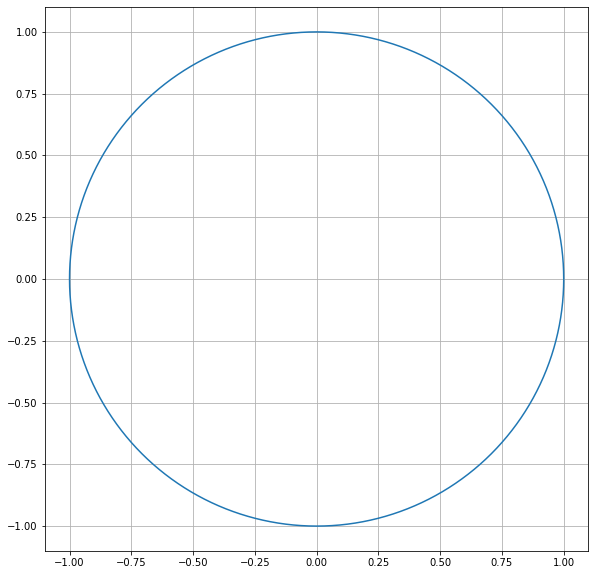

In [10]:
myplot(xy[:, 0], xy[:, 1])

## Задание №2

1. Нарисовать эпитрохоиду или гипотрохоиду используя параметрические уравнения этих кривых.
2. Нарисовать эпитрохоиду или гипотрохоиду используя лишь повороты точек катящейся окружности.
3. Рисунок 7 показывает из каких поворотов состоит перемещение точки циклоидальной кривой 𝑃.
Вначале точка 𝑃 поворачивается вокруг центра большой окружности 𝑂 на угол 𝜑 и переходит
в точку 𝑃𝜑. Затем 𝑃𝜑 поворачивается вокруг центра 𝑜𝜑 на угол 𝜃. Ваша задача заключается
в том, чтобы правильно вычислить угол 𝜃. Он полностью определяется углом 𝜑 и радиусами
окружностей 𝑅 и 𝑟.

Формула для параметрического задания:
$ 𝑥(𝑡) = 𝑅(1 − 𝑘) cos(𝑘𝑡) + 𝑑 cos((1 − 𝑘)𝑡) $
$ 𝑦(𝑡) = 𝑅(1 − 𝑘) sin(𝑘𝑡) − 𝑑 sin((1 − 𝑘)𝑡) $

Чтобы выяснить, где находится центр малой окружности, воспользуемся обычными $sin$ и $cos$

![Пояснение](explanationo.jpg)

In [62]:
def parametric1_hyp(r, R, d):
    # TODO: NEEDS REFACTORING. I USE THE FUNCTION parametric2_hyp() IN THE MEANTIME
    k = R / r
    fi = np.linspace(0, np.pi * 2, 1000)
    t = fi / k
    x = np.array( R * (1 - k) * np.cos(k * t) + d * np.cos((1 - k) * t) )
    y = np.array( R * (1 - k) * np.sin(k * t) - d * np.sin((1 - k) * t) )
    return x, y

def parametric2_hyp(r, R, d, cycles=1):
    """
    Получаем эпитрохоиду параметрически.
    :param r: радиус малой окружности
    :param R: радиус большой окружности
    :param d: расстояние от центра малой окружности до точки, которая будет рисовать
    :param cycles: количество повторов (увеличение или уменьшение размера fi)
    :return: кортеж из значений по x и по y
    """
    fi = np.linspace(0, np.pi * 2 * cycles, 1000)
    x = (R - r) * np.cos(fi) + d * np.cos( (R - r) / r * fi )
    y = (R - r) * np.sin(fi) - d * np.sin( (R - r) / r * fi )
    return x, y

def rotation_hyp(r, R, d, cycles=2):
    """
    Получаем эпитрохоиду вращением
    :param r: радиус малой окружности
    :param R: радиус большой окружности
    :param d: расстояние от центра малой окружности до точки, которая будет рисовать
    :return: np.array из значений x и y.
    """
    # Angle for big circle
    delta = 2 * np.pi / 1000 * cycles
    xy = np.zeros([1000, 2])
    xy[0] = np.array([R + d, 0])
    len_ = R * delta
    out_xy = np.zeros([1000, 2])

    # Angle for small circle
    theta = len_ / r

    for i in range(1, 1000):
        # print("Rotation matrix is the following:", rot_mat(delta*i))
        # print("The angle in rad is following:", delta*i)
        out_rotated = xy[0] @ rot_mat(delta * i)
        out_xy[i] = out_rotated
        # print(out_rotated)
        hypot = np.hypot(out_rotated[0], out_rotated[1])
        in_x = (R - r) * out_rotated[0] / hypot
        in_y = (R - r) * out_rotated[1] / hypot
        in_rotated = xy_rotation(out_rotated, [in_x, in_y], rad=(theta * i))
        # print(in_rotated)
        xy[i] = in_rotated
    return xy, out_xy


In [12]:
# TODO: FIX IT
# x, y = parametric1_hyp(1, 5, 1)
# myplot(x, y)

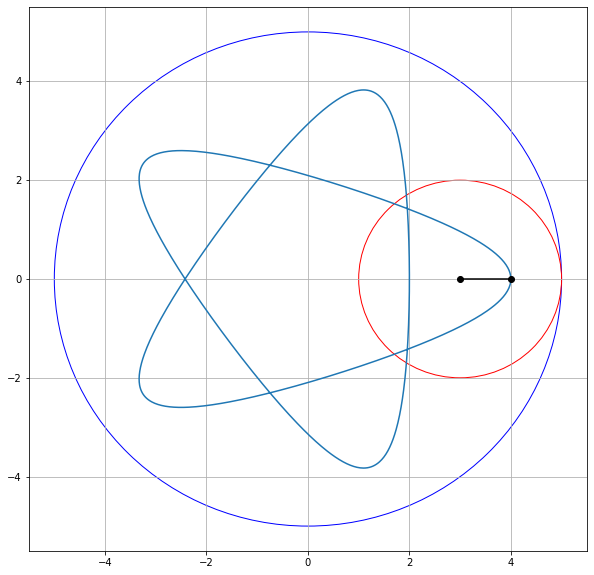

In [29]:
x, y = parametric2_hyp(2, 5, 1, 2)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.grid()

circle_out = mpatches.Circle([0, 0], 5, color="blue", fill=False)
circle_in = mpatches.Circle([3, 0], 2, color="red", fill=False)
ax.add_patch(circle_out)
ax.add_patch(circle_in)

ax.plot(x, y)
ax.plot([3, 4], [0, 0], marker='o', color='black')


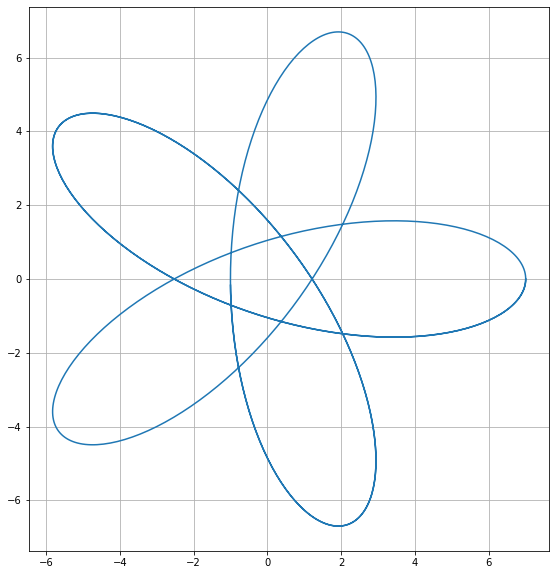

In [67]:
xy, out = rotation_hyp(2, 5, 2, 3)
myplot(xy[:, 0], xy[:, 1])
# myplot(out[:, 0], out[:, 1])



In [37]:
xy[:50]

array([[ 7.00000000e+00,  0.00000000e+00],
       [ 7.00000000e+00,  4.30795012e-18],
       [ 7.00000000e+00, -4.63115966e-18],
       [ 7.00000000e+00, -5.71066756e-18],
       [ 7.00000000e+00,  3.02763377e-17],
       [ 7.00000000e+00, -3.13923057e-18],
       [ 7.00000000e+00,  2.03155831e-17],
       [ 7.00000000e+00, -2.44952369e-18],
       [ 7.00000000e+00,  4.58387772e-17],
       [ 7.00000000e+00, -3.33170625e-17],
       [ 7.00000000e+00,  7.38974795e-18],
       [ 7.00000000e+00,  1.53729254e-17],
       [ 7.00000000e+00,  2.46653076e-17],
       [ 7.00000000e+00,  9.02544906e-17],
       [ 7.00000000e+00,  7.83906914e-17],
       [ 7.00000000e+00,  2.71452985e-17],
       [ 7.00000000e+00, -5.76552593e-17],
       [ 7.00000000e+00, -5.45968813e-17],
       [ 7.00000000e+00,  4.07292211e-18],
       [ 7.00000000e+00,  8.02517640e-17],
       [ 7.00000000e+00, -8.81065781e-17],
       [ 7.00000000e+00,  6.81639590e-17],
       [ 7.00000000e+00, -7.07295687e-17],
       [ 7.